#  Sinusoids  - Time and Spectrum  
This program is an introductory program to DSP

# Time Domain

In [1]:
%matplotlib inline
%matplotlib notebook
import numpy as np
import matplotlib.pyplot  as plt
import math
from scipy.fftpack import fft, ifft
import ipywidgets

<StemContainer object of 3 artists>

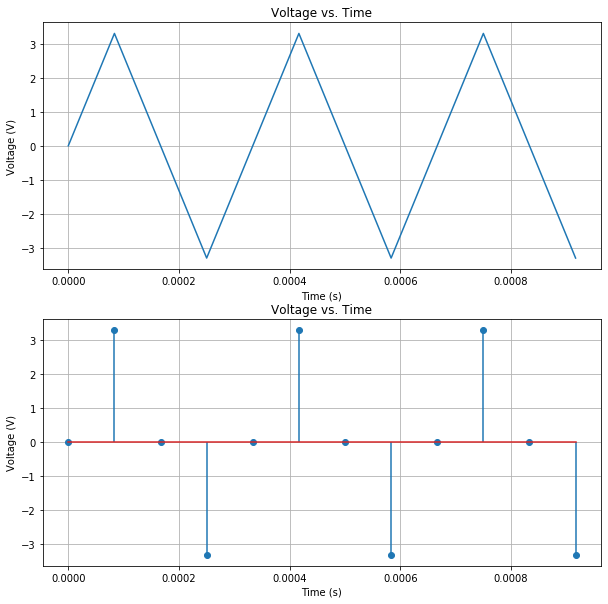

In [6]:
### duration = eval(input("Duration (s):"))
duration =  1e-3 # eval(input("Duration:"))
freq     =  3000 # eval(input("Frequency (Hz):"))
Fs  =  4*freq    # freq*eval(input("Sample Frequency:"))
amp =  3.3       # eval(input("Amplitutde (V):"))
theta = 0       #Phase shift
t  = np.arange(0,duration, 1/Fs)
s1 = amp*np.sin(2*np.pi*freq*t + theta)

# Waveform display
fig = plt.figure( 'position', [10,10])
ax  = fig.subplots(2,1) #Fig: figure object, ax: plot axes
ax[0].set(xlabel='Time (s)', ylabel='Voltage (V)', title='Voltage vs. Time')
ax[0].grid()
ax[0].plot(t,s1)

#Stem plot
ax[1].set(xlabel='Time (s)', ylabel='Voltage (V)', title='Voltage vs. Time')
ax[1].grid()
ax[1].stem(t,s1, use_line_collection=True)

# Frequency Domain